<a href="https://colab.research.google.com/github/RafaelNovais/MasterAI/blob/master/Assignment2_DL_23113607.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Deep Learning (/Online) CT5133 / CT5145, 2024-2025

# Assignment 2

* In this assignment we will use a modern neural network library, ie Keras or PyTorch;
* We will create a small model for classification of the Fashion-MNIST dataset;
* We will inspect and comment on the output of each layer before training, and after 1 epoch, after 2 more epochs, etc.;
* We will look at the performance of the model.

# Admin details

**Weight**: This assignment is worth 20% of the module.

**Submission**: Work in this file, and submit a single `.ipynb` file. Do not submit a `.zip`.

**Due date**: end of Week 10, as announced on Canvas. No extensions are possible because of the requirement for interviews (see below).

**Groups**: you may work alone, or in a group of 2 of your choice. If in a group of 2, you must inform the lecturer of the group by email, cc-ing both members and including both members' names and ID numbers. You must send that email at least 1 week before the due date. And you must work together on all parts: you cannot divide the parts up between the group members. If in a group of 2, both students should make a submission and both should be identical.

**Academic integrity**: You may discuss the assignment with other students/groups, but may not show your work to others or allow others to see yours. You may use code sourced from the internet, and code sourced from AI. You must include a citation and URL in such cases, showing specifically what parts of your code were sourced from what. For example, a URL should be placed to show which lines were sourced from which page. If using AI, you must cite the AI name and version, and URL, and quote the prompt(s). Regardless of what you submit, you must understand it when interviewed (see below).

**Interviews**: after submission, some students/groups will be interviewed to check on their understanding of their own work. An inability to explain your work may result in a grade penalty, a zero grade, or an academic integrity report. Students who discuss their genuine work-in-progress with lecturer or TAs in labs before submission are less likely to be selected for interview. Students who submit code that suggests a lack of understanding are more likely to be selected for interview. Submissions which appear to be unrelated to class materials, discussions, code and terminology as used in class and labs, are more likely to be selected for interview. Interviews will take place **during the normal lab times**, that is Tuesdays 4-6pm (CT5133) and Tuesdays / Thursdays 6-7pm (CT5145) during Weeks 11 and 12. Please book these slots in your calendar now, as when individuals are called to interview there will not be an opportunity to reschedule. Failure to attend interview will result in a zero grade for the assignment.

**Academic integrity: School policy and guidelines**: https://www.universityofgalway.ie/science-engineering/school-of-computer-science/currentstudents/academicintegrity/

# Tasks

1. Load the Fashion-MNIST dataset.
2. Create a suitable small model in Keras or PyTorch, ending in a suitable softmax layer, and show a summary of the layers and number of parameters, but do not train it yet.
3. Calculate its performance on `x_test, y_test`, and illustrate its performance by completing the function `display_images_labels_preds` and calling it.
4. For each layer (excluding layers with no weights, such as Batch-Norm, Dropout, Maxpool), extract the outputs of that layer when running the model on `x_viz`.
5. Use the provided code `visualize_layer_outputs` to visualise (a subset of) the outputs found in step 3, coloured by `y_viz`.
6. Now train for 1 epoch, and repeat steps 3-5.
7. Now train for 2 **more** epochs (total 3 epochs so far), and repeat steps 3-5.
8. Now train for 3 **more** epochs (total 6 epochs so far), and repeat steps 3-5.
9. Continue until you judge the model is trained sufficiently.
10. Comment very briefly (eg, up to 5 bullet-points) on the distributions you observe in steps 3-9. Marks will be awarded for insight, not comprehensiveness. That is, you need to show you know what has happened and why. You don't need to comment on every individual plot.

# Notes

* A lot of code is provided below.
* You may wish to wrap all of steps 3-9 in a for-loop, rather than writing it out as separate steps.
* Before completing all of the above, you may wish to experiment with different models and hyperparameters until you arrive at a design that will train successfully (eg, at least 80% accuracy on `x_test, y_test`).
* You may be able to carry out training for this assignment locally. Google Colab or other online services can also be used.
* I am loading the data using Keras, but you can use Keras or PyTorch for your code.

# Some typical interview questions

* Why does this layer have this number of parameters?
* What does this line of code do?
* Why is the data distributed in this way?
* Which layer gives the most useful embedding for the classification task?

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, Dense, Flatten, InputLayer, Dropout, BatchNormalization, MaxPooling2D

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
import pandas as pd

from tensorflow.keras import layers
from tensorflow import keras


In [2]:

def load_fashion_mnist_5():

    # loading F-MNIST using Keras
    # we select just 5 of the Fashion-MNIST classes
    # we're also going to discard a lot of data, just to make training quick,
    # and make it easy to see the progress of a *small* amount of training at a time
    # in real life, we pretty much never discard training data.


    (x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

    # Filter 5 classes from training data
    selected_classes = [0, 1, 2, 3, 4]
    mask_train = np.isin(y_train, selected_classes)
    x_train = x_train[mask_train]
    y_train = y_train[mask_train]

    # Filter test data
    mask_test = np.isin(y_test, selected_classes)
    x_test = x_test[mask_test]
    y_test = y_test[mask_test]

    # reshape
    x_train = x_train.reshape(-1, 28, 28, 1)
    x_test = x_test.reshape(-1, 28, 28, 1)

    # discard many of the images
    idxs = np.random.choice(x_train.shape[0], size=2000, replace=False)
    x_train = x_train[idxs]
    y_train = y_train[idxs]

    # we only need a little data for test, again just to make things quick
    idxs = np.random.choice(x_test.shape[0], size=500, replace=False)
    x_test = x_test[idxs]
    y_test = y_test[idxs]

    # we also want a very small subset of unseen data for visualisation.
    idxs = np.random.choice(x_test.shape[0], size=200, replace=False)
    x_viz = x_test[idxs]
    y_viz = y_test[idxs]

    return (x_train, y_train), (x_test, y_test), (x_viz, y_viz)

In [3]:
(x_train, y_train), (x_test, y_test), (x_viz, y_viz) = load_fashion_mnist_5()
print(f"x_train: {x_train.shape}")
print(f"y_train: {y_train.shape}")
print(f"y_viz classes: {np.unique(y_train)}")
print(f"x_test: {x_test.shape}")
print(f"y_test: {y_test.shape}")
print(f"y_viz classes: {np.unique(y_test)}")
print(f"x_viz: {x_viz.shape}")
print(f"y_viz: {y_viz.shape}")
print(f"y_viz classes: {np.unique(y_viz)}")


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
x_train: (2000, 28, 28, 1)
y_train: (2000,)
y_viz classes: [0 1 2 3 4]
x_test: (500, 28, 28, 1)
y_test: (500,)
y_viz classes: [0 1 2 3 4]
x_viz: (200, 28, 28, 1)
y_viz: (200,)
y_viz classes: [0 1 2 3 4]


In [4]:
# Create model
model = None # YOUR CODE HERE. create and compile the model, but don't train it yet

model = Sequential([InputLayer(input_shape=(28, 28, 1)),Conv2D(32, (3,3), activation='relu'),MaxPooling2D((2,2)),Conv2D(64, (3,3),
    activation='relu'),MaxPooling2D((2,2)),Flatten(),Dense(128, activation='relu'),
    Dense(5, activation='softmax')])

num_hidden_layers = 6
layer_sizes = [128, 64]

for size in layer_sizes[:num_hidden_layers]:
    model.add(Dense(size, activation='relu'))

model.add(Dense(5, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])





/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


In [5]:
# Summarise the model

# YOUR CODE HERE. print out a summary of the model's layers, number of parameters.
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 5)                   │             645 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │             768 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 5)                   │             325 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 233,738 (913.04 KB)

 Trainable params: 233,738 (913.04 KB)

 Non-trainable params: 0 (0.00 B)

In [6]:
def display_images_labels_preds(model, x, y, n_images):
    # display some of the images in x, with the ground-truth label and the model's label
    # see below for an example

    # model: an NN model which can be run
    # x: image data of shape (n, 28, 28, 1)
    # y: label data of shape (n,)

    # YOUR CODE HERE: run the model to get its predictions
    model
    loss, accuracy = model.evaluate(x_test, y_test, verbose=0)
    print(f"Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}")
    y_pred = model.predict(x_test)
    y_pred_classes = np.argmax(y_pred, axis=1)

    plt.figure(figsize=(15, 3))
    for i in range(n_images):
        idx = random.randrange(len(y))
        plt.subplot(1, n_images, i+1)
        plt.imshow(x[idx].reshape(28, 28), cmap='gray')
        plt.title(f"True: {y[idx]}, Pred: {y_pred_classes[idx]}") # YOUR CODE HERE: show the true y value and the model's prediction
        plt.axis('off')
    plt.tight_layout()


Test Loss: 1.6116, Test Accuracy: 0.2100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


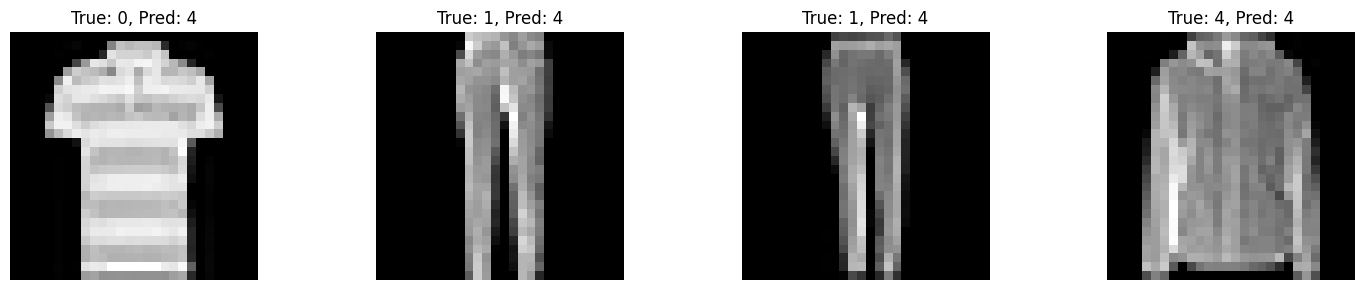

In [7]:
display_images_labels_preds(model, x_test, y_test, 4)

In [8]:
def extract_layers_outputs(model, x):
    outputs = []

    # YOUR CODE HERE. run x through the model, and save the resulting output from *each* layer to the list 'outputs'
    layer_outputs = [layer.output for layer in model.layers]
    intermediate_model = Model(inputs=model.layers[0].input, outputs=layer_outputs)
    outputs = intermediate_model.predict(x)

    return outputs

In [9]:
def visualize_layer_outputs(layer_output, y, max_features=5):

    # create a pairplot to show the pairwise distributions of several features from among those in layer_output
    # max_features is 5 as it's hard to look at more pairwise plots than this
    # if layer_output contains more than 5 features, we randomly sub-sample.

    # THIS FUNCTION IS COMPLETE, no need to write anything.
    # This function is expected to work regardless of what NN library you use,
    # as it just treats layer_output as a numpy array

    # Flatten the layer output, so we can deal with output from this layer no matter what shape
    samples = layer_output.shape[0]
    flattened = layer_output.reshape(samples, -1)

    # Select features (all if less than max_features, otherwise random sample)
    feature_count = flattened.shape[1]
    if feature_count <= max_features:
        selected_indices = range(feature_count)
    else:
        selected_indices = np.random.choice(feature_count, max_features, replace=False)

    # Create DataFrame with selected features
    df = pd.DataFrame(flattened[:, selected_indices],
                     columns=[f'Feature_{i}' for i in selected_indices])
    df['Class'] = y  # Add labels as a column

    # Create the pairplot with hue parameter for coloring by class
    plot = sns.pairplot(df, corner=True, diag_kind='kde', hue='Class', palette='Set1')
    plt.suptitle(f'Layer Output Distribution (showing {len(selected_indices)} features)', y=1.02)

    return plot


Epoch 1/6
Epoch 1/6
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - accuracy: 0.2155 - loss: 1.6092 - val_accuracy: 0.1920 - val_loss: 1.6107
Epoch 2/6
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - accuracy: 0.2087 - loss: 1.6099 - val_accuracy: 0.1920 - val_loss: 1.6109
Epoch 3/6
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 50ms/step - accuracy: 0.2183 - loss: 1.6082 - val_accuracy: 0.1920 - val_loss: 1.6112
Epoch 4/6
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 73ms/step - accuracy: 0.2159 - loss: 1.6086 - val_accuracy: 0.2060 - val_loss: 1.6108
Epoch 5/6
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 66ms/step - accuracy: 0.2149 - loss: 1.6073 - val_accuracy: 0.1920 - val_loss: 1.6107
Epoch 6/6
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - accuracy: 0.2038 - loss: 1.6087 - val_accuracy: 0.1920 - val_loss: 1.6112
Test Loss: 1.6112, Test Accuracy: 0.1920
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step
Epoch 2/6
Epoch 1/6
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - accuracy: 0.2222 - loss: 1.6084 - val_accuracy: 0.1920

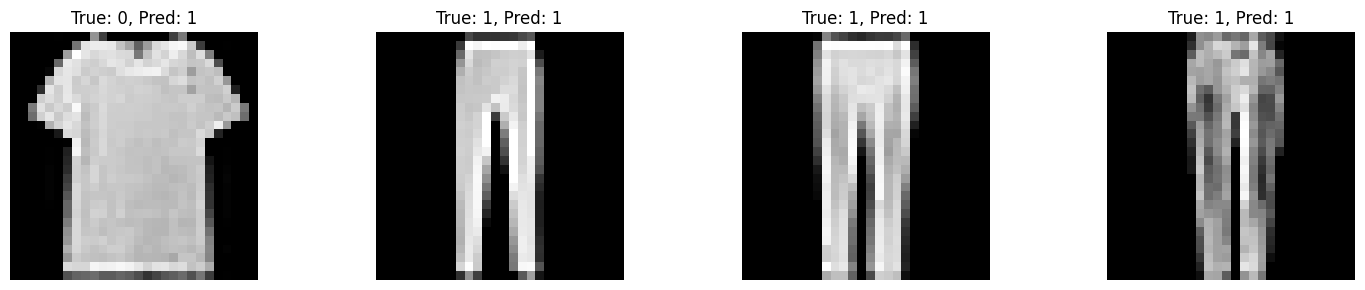

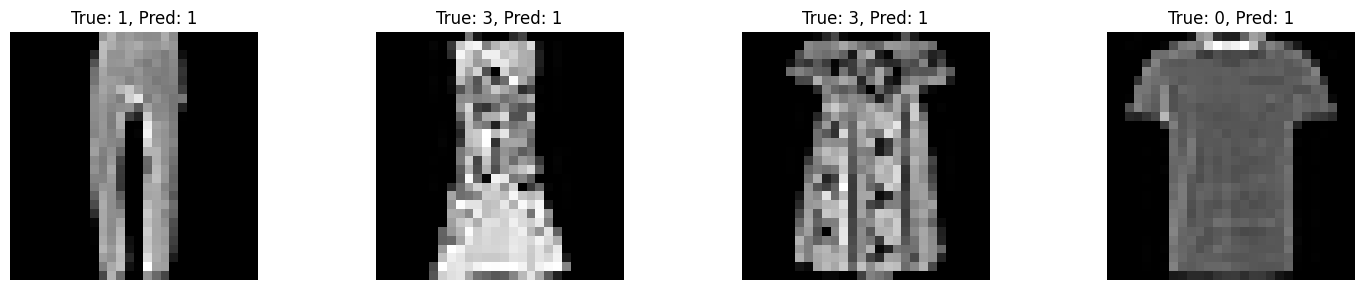

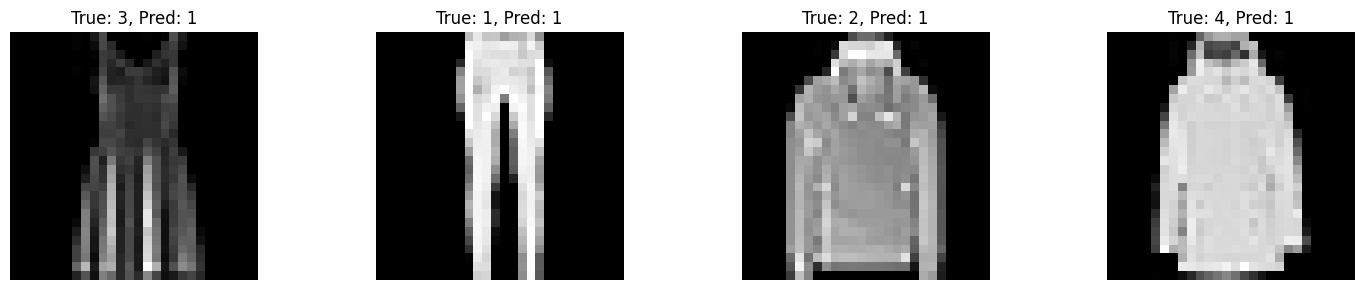

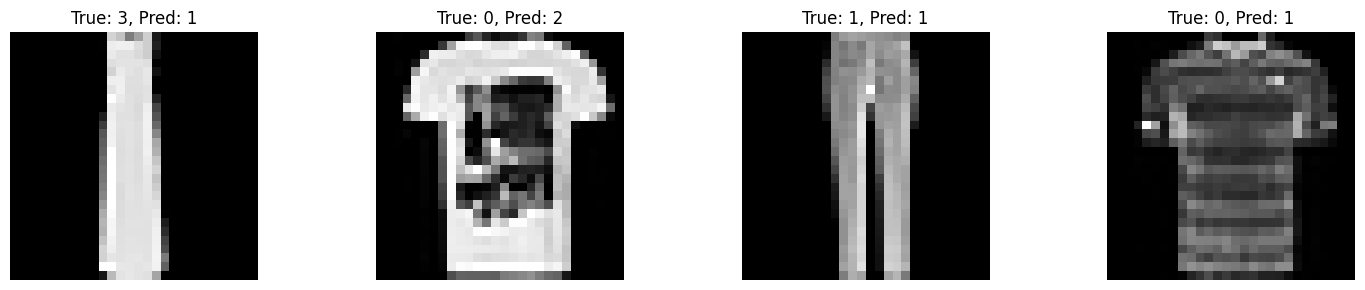

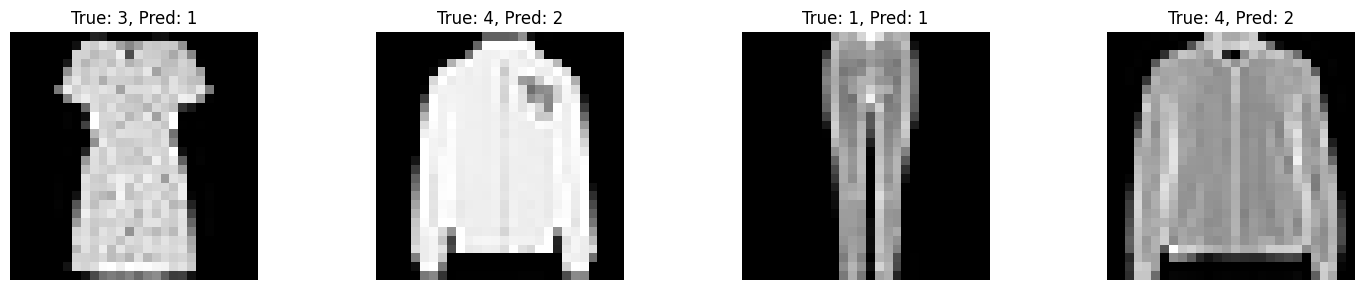

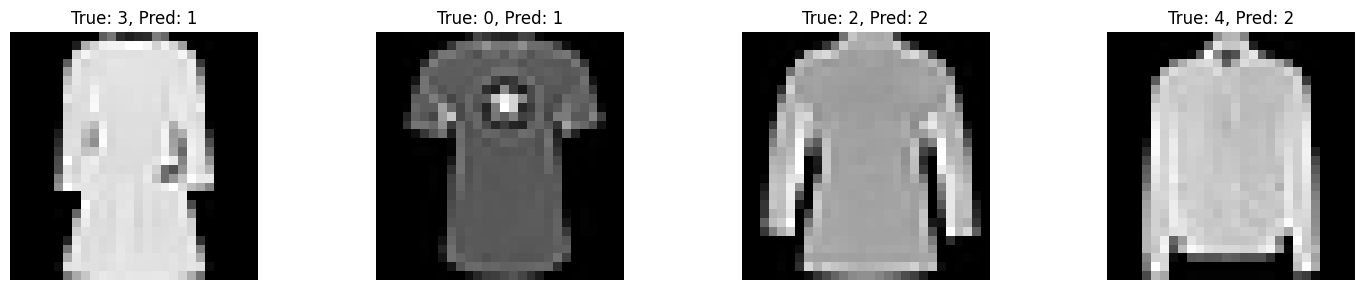

In [12]:
# YOUR CODE HERE. visualise, look at performance, train for some epoch(s), repeat

num_epochs = 6
num_batch = 64


for epoch in range(num_epochs):
    print(f"Epoch {epoch+1}/{num_epochs}")
    model.fit(x_train, y_train, epochs=num_epochs, batch_size=num_batch, validation_data=(x_test, y_test), verbose=1)
    display_images_labels_preds(model, x_test, y_test, n_images=4)
    extract_layers_outputs(model, x_viz)

final_loss, final_accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f"Final Accuracy: {final_accuracy:.4f}")